<a href="https://colab.research.google.com/github/adityamind/Breast-Cancer-detection/blob/master/Breast_Cancer_Detaection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Detection using machine learning algorithm**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

# **1. Dataset Exploration**

## **1.1 Loading the dataset**

In [2]:
from google.colab import files
up=files.upload()
df=pd.read_csv('data.csv')

Saving data.csv to data.csv


## **1.2 Size of the dataset**

In [3]:
df.shape

(569, 32)

## **1.3 Describing the dataset**

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## **1.4 How the dataset looks like**

In [5]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


## **1.5 List of feature names**

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# **1.6 Plot histogram of each parameter**

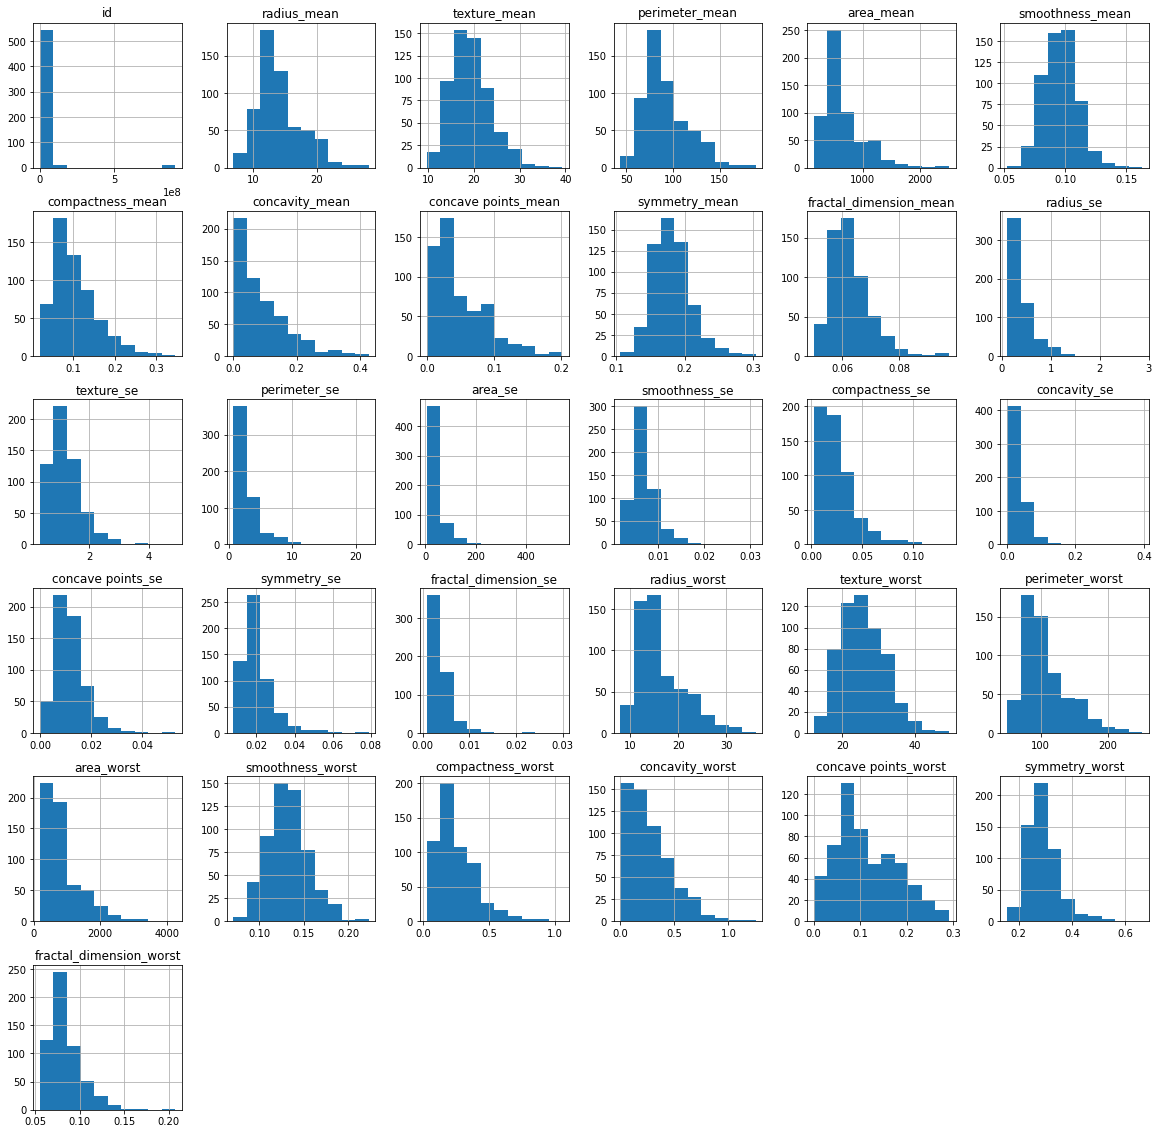

In [7]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,20))
plt.show()

# **1.7 Unique values of target variable**

In [8]:
print(f"Unique values of target variable:-\n{df['diagnosis'].unique()}")
print("M for patient with cancer\nB for patient with no cancer")

Unique values of target variable:-
['M' 'B']
M for patient with cancer
B for patient with no cancer


# **1.8 Number of samples under each target value**

In [9]:
print(f"Number of samples under each target value:- \n{df['diagnosis'].value_counts()}")

Number of samples under each target value:- 
B    357
M    212
Name: diagnosis, dtype: int64


# **1.9 Number of samples in graph format**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


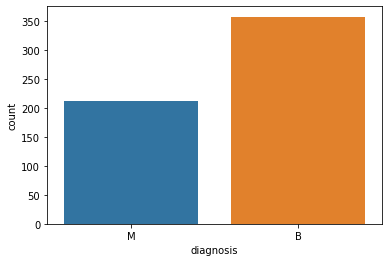

In [10]:
import seaborn as sns
sns.countplot(df['diagnosis'],label='count')

### **1.10 Imbalance in the data**

In [11]:
malignant=df[df['diagnosis']=='M']
benign=df[df['diagnosis']=='B']
outlierFraction=len(malignant)/len(benign)
print(outlierFraction)
print('Patient with cancer: {}'.format(len(malignant)))
print('Patient with no cancer: {}'.format(len(benign)))

0.5938375350140056
Patient with cancer: 212
Patient with no cancer: 357


# **2. Data Preprocessing**

## **2.1 Checking null or nan values**

In [15]:
print("Dataset info:-")
print(df.info())

Dataset info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

## **2.2 Drop the column with null or nan values**

In [16]:
df=df.dropna(axis=1)

## **2.3 Label encoding of target attribute**

In [27]:
from sklearn.preprocessing import LabelEncoder
le_y=LabelEncoder()
df.iloc[:,1]=le_y.fit_transform(df.iloc[:,1].values)

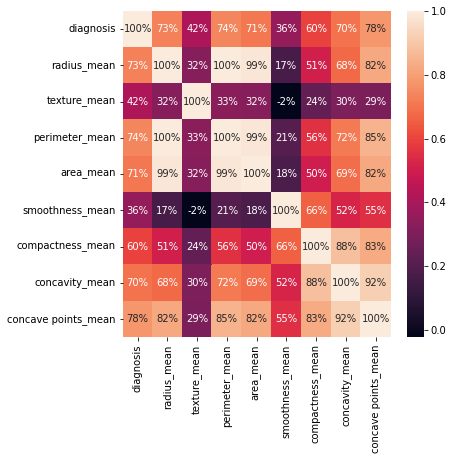

In [28]:

plt.figure(figsize=(6,6))
sns.heatmap(df.iloc[:,1:10].corr(),annot=True,fmt='.0%')

## **2.4 Split the dataset into independent x and dependent y**

In [32]:
x=df.iloc[:,2:31].values
y=df.iloc[:,1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 29)
(114, 29)
(455,)
(114,)


## **2.5 Data transformation**

In [33]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


# **3. SMOTETomek (combination of undersampling and oversampling)**

In [36]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(sampling_strategy='all',random_state=42)
x_res,y_res=smk.fit_resample(x_train,y_train)
x_res.shape,y_res.shape

((576, 29), (576,))

# **3. KNN**

In [37]:
#finding the distance
def find_dist(x1,x2):
  dist=0.0
  for i in range(len(x1)):
    dist+=(x1[i]-x2[i])*(x1[i]-x2[i]);
  return np.sqrt(dist)

In [38]:
#finding k nearest neighbor
def KNeighbor(train_x,test_x,train_y,k):
  distances=list()
  k_distance=list()
  for (row,d) in zip(train_x,train_y):
    dist=find_dist(row,test_x)
    distances.append((d,dist))
  distances.sort(key=lambda z:z[1])
  for i in range(k):
    k_distance.append(distances[i][0])
  return k_distance

In [41]:
#prediction
def prediction(train_x,test_x,train_y,k):
  predict=KNeighbor(train_x,test_x,train_y,k)
  return max(set(predict),key=predict.count)

In [42]:
#calling for test data
def KNN(train_x,test_x,train_y,k=5):
  result=list()
  for row in test_x:
    result.append(prediction(train_x,row,train_y,k))
  return result

accurcy is:  97.36842105263158


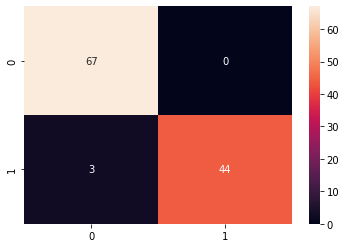

In [43]:
predicted=KNN(x_res,x_test,y_res,k=5)
cm=confusion_matrix(y_test,predicted)
sns.heatmap(cm, annot=True)
tp=cm[0][0]
tn=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]
print('accurcy is: ',(tp+tn)*100/(tp+tn+fp+fn))

In [44]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **4. SVM**

In [45]:
class SVM_Classifier:
    
    def __init__(self,learning_rate=0.001,lamda_parameter=0.01,n_itteration=1000):
        self.lr=learning_rate;
        self.lamda_parameter=lamda_parameter;
        self.n_itteration=n_itteration;
    
    
    def fit(self,X,Y):
        self.instances,self.features=X.shape;
        self.w=np.zeros(self.features);
        self.b=0;
        y_i=np.where(Y>=1,1,-1);
        
        for i in range(self.n_itteration):
            for idx,x_i in enumerate(X):
                condition=y_i[idx]*(np.dot(self.w,x_i)-self.b)>=1;
                if condition:
                    dw=2*self.lamda_parameter*self.w;
                    db=0;
                else:
                    dw=2*self.lamda_parameter*self.w-np.dot(x_i,y_i[idx]);
                    db=y_i[idx];
                self.w-=self.lr*dw;
                self.b-=self.b*db;
    
    def predict(self,X):
        output=np.dot(X,self.w)-self.b;
        target=np.sign(output);
        output=np.where(target>=1,1,0);
        return output;


In [46]:
svm=SVM_Classifier()
svm.fit(x_res,y_res)

In [47]:
results=svm.predict(x_test)

accurcy is:  96.49122807017544


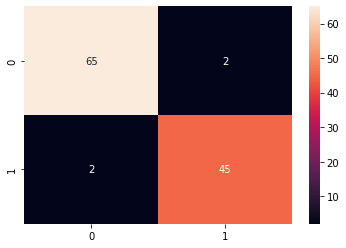

In [49]:
cm=confusion_matrix(y_test,results)
sns.heatmap(cm, annot=True)
tp=cm[0][0]
tn=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]
print('accurcy is: ',(tp+tn)*100/(tp+tn+fp+fn))

In [50]:
print(classification_report(y_test,results))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

